In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from joblib import dump

data = pd.read_csv('data/Covid Dataset.csv')
data = data.drop(['Abroad travel','Wearing Masks','Sanitization from Market'], axis=1)

label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

X = data.drop('COVID-19', axis=1) 
y = data['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6984)
decision_tree = DecisionTreeClassifier(random_state=6984)
decision_tree.fit(X_train, y_train)

dump(decision_tree, 'data/decision_tree.joblib')

['data/decision_tree.joblib']

In [6]:
mes_symptomes = {
    "Breathing Problem": [0],
    "Fever": [0],
    "Dry Cough": [0],
    "Sore throat": [0],
    "Running Nose": [0],
    "Asthma": [0],
    "Chronic Lung Disease": [0],
    "Headache": [0],
    "Heart Disease": [0],
    "Diabetes": [0],
    "Hyper Tension": [0],
    "Fatigue ": [0],
    "Gastrointestinal ": [0],
    "Contact with COVID Patient": [0],
    "Attended Large Gathering": [0],
    "Visited Public Exposed Places": [0],
    "Family working in Public Exposed Places": [0],
}

symptomes_df = pd.DataFrame(mes_symptomes)

prediction = decision_tree.predict(symptomes_df)

resultat = "Positif au COVID-19" if prediction[0] == 1 else "Négatif au COVID-19"
print(resultat)


Négatif au COVID-19


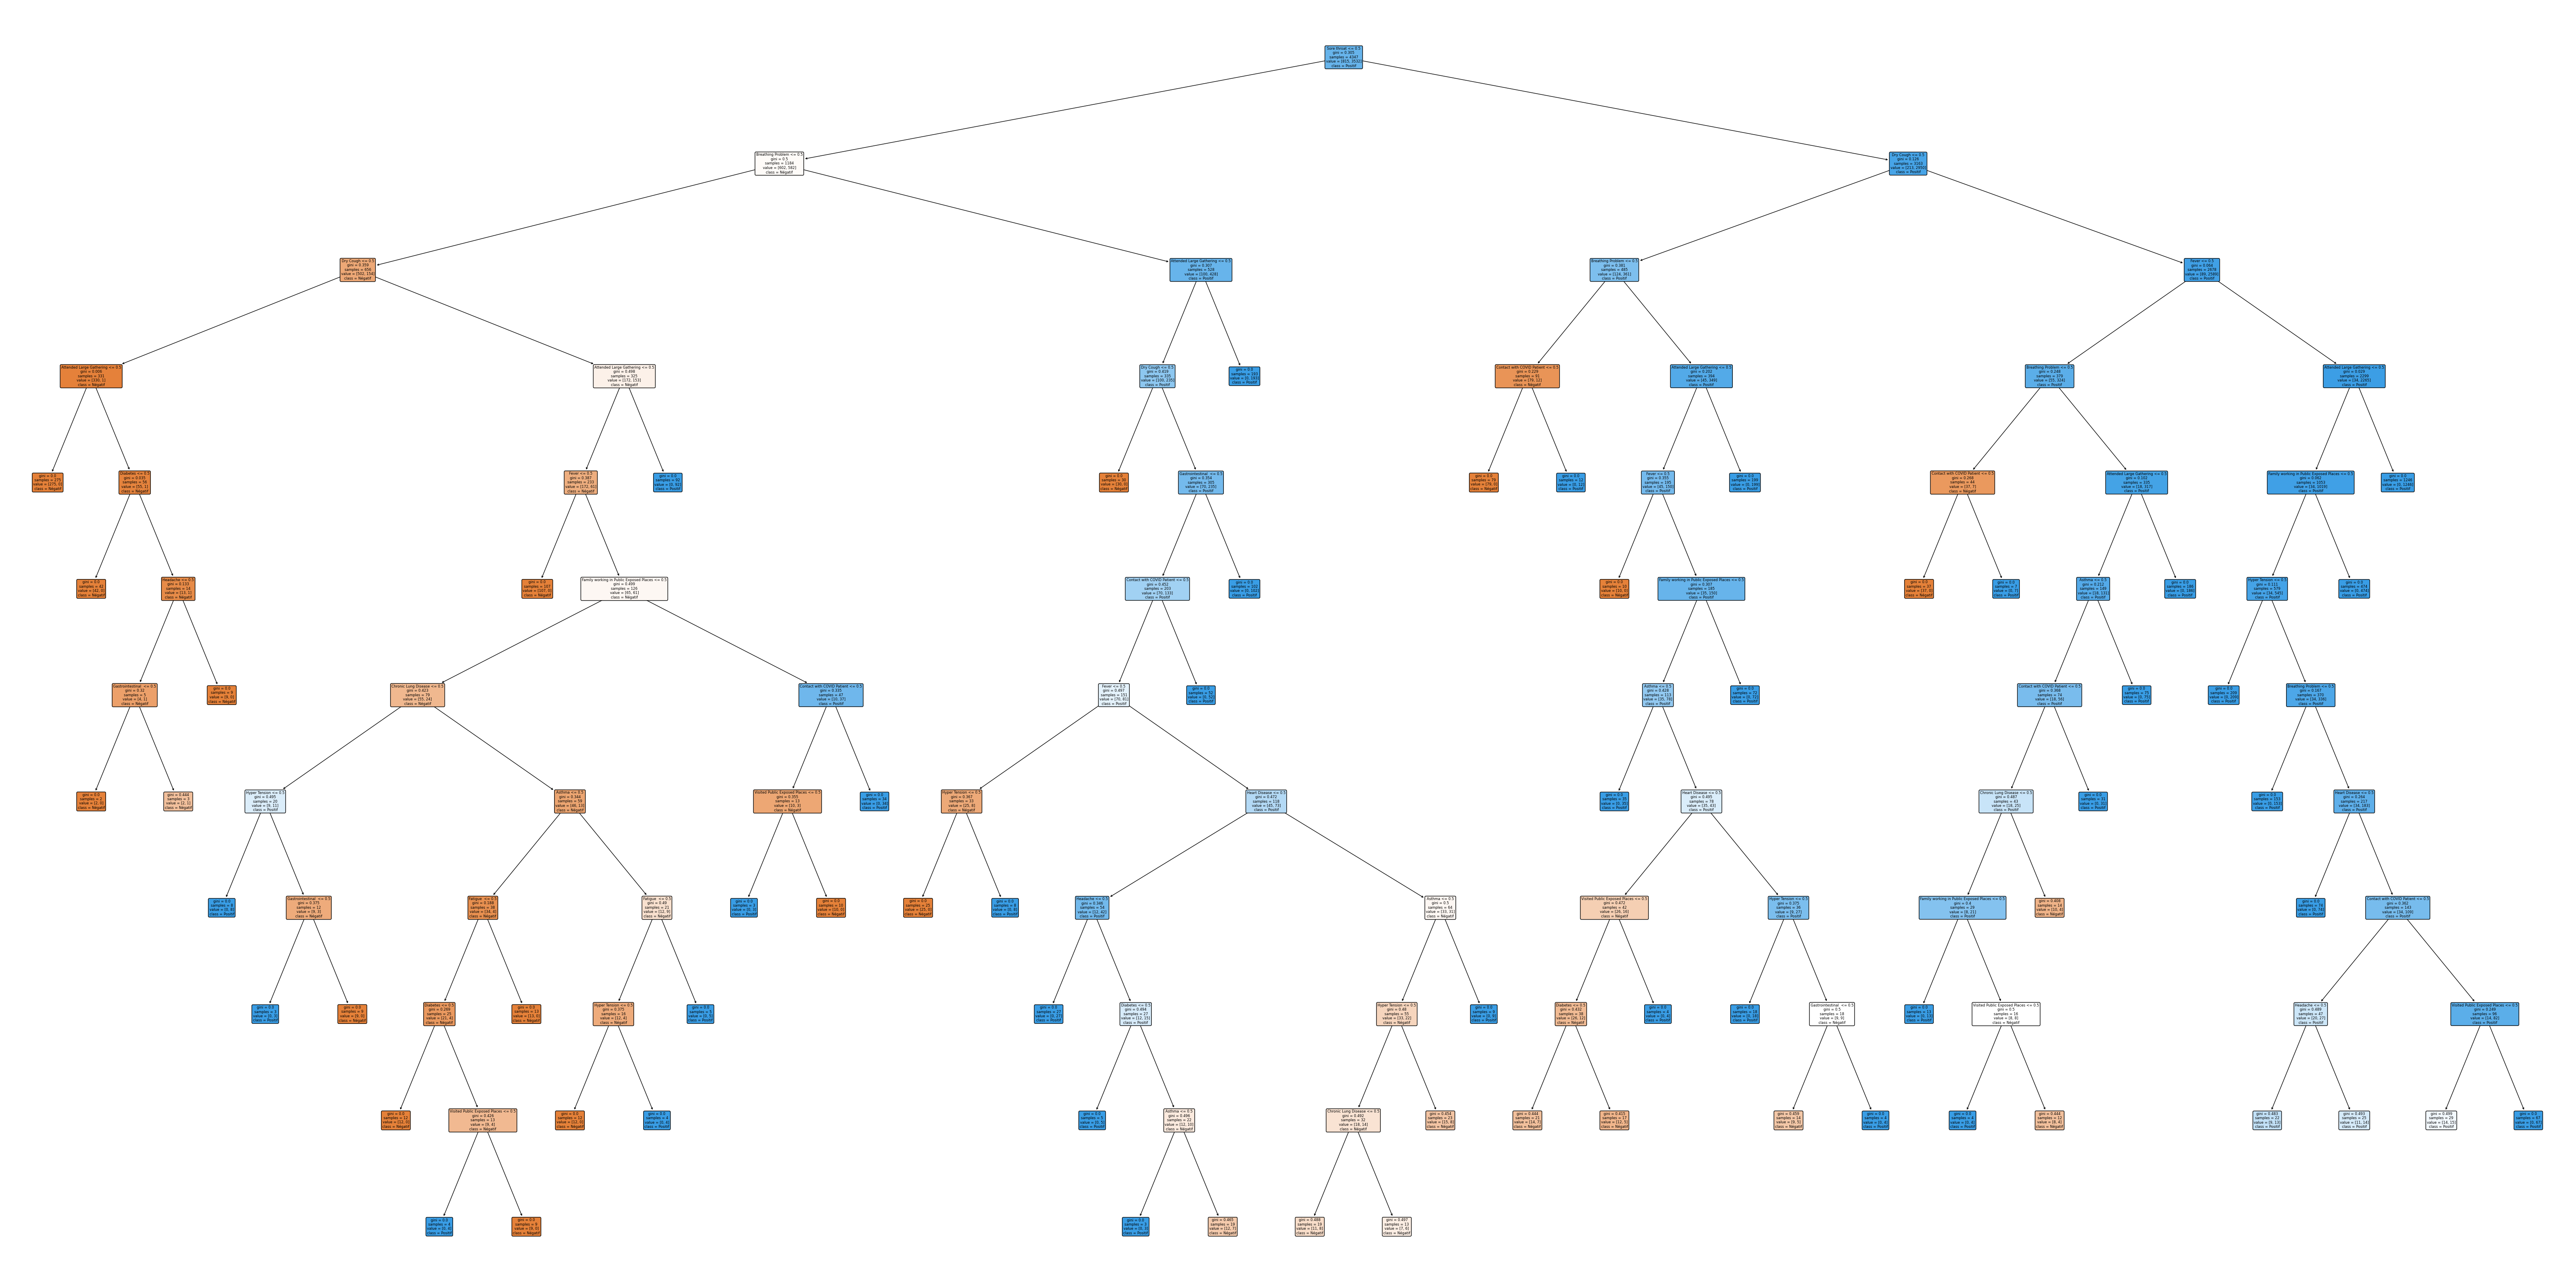

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Supposons que 'decision_tree' est votre modèle d'arbre de décision entraîné
# Visualiser l'arbre de décision
plt.figure(figsize=(80, 40))
dpi=100
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Négatif', 'Positif'], rounded=True)
plt.show()


# Version 1

In [9]:
# Question asking section
print("Avez-vous un problème respiratoire ?") 
breathing_problem = int(input("1: Oui, 0: Non\n"))
print("Avez-vous de la fièvre ?")
fever = int(input("1: Oui, 0: Non\n"))
print("Avez-vous une toux sèche ?")
dry_cough = int(input("1: Oui, 0: Non\n"))
print("Avez-vous mal à la gorge ?")
sore_throat = int(input("1: Oui, 0: Non\n"))
print("Avez-vous le nez qui coule ?")
running_nose = int(input("1: Oui, 0: Non\n"))
print("Avez-vous de l'asthme ?")
asthma = int(input("1: Oui, 0: Non\n"))
print("Avez-vous une maladie pulmonaire chronique ?")
chronic_lung_disease = int(input("1: Oui, 0: Non\n"))
print("Avez-vous mal à la tête ?")
headache = int(input("1: Oui, 0: Non\n"))
print("Avez-vous une maladie cardiaque ?")
heart_disease = int(input("1: Oui, 0: Non\n"))
print("Avez-vous du diabète ?")
diabetes = int(input("1: Oui, 0: Non\n"))
print("Avez-vous de l'hypertension ?")
hyper_tension = int(input("1: Oui, 0: Non\n"))
print("Êtes-vous fatigué ?")
fatigue = int(input("1: Oui, 0: Non\n"))
print("Avez-vous des problèmes gastro-intestinaux ?")
gastrointestinal = int(input("1: Oui, 0: Non\n"))
print("Avez-vous voyagé à l'étranger ?")
abroad_travel = int(input("1: Oui, 0: Non\n"))
print("Avez-vous été en contact avec un patient atteint de la COVID ?")
contact_with_covid_patient = int(input("1: Oui, 0: Non\n"))
print("Avez-vous participé à un rassemblement public ?")
attended_large_gathering = int(input("1: Oui, 0: Non\n"))
print("Avez-vous visité des lieux publics exposés (école, restaurant, ...) ?")
visited_public_exposed_places = int(input("1: Oui, 0: Non\n"))
print("Votre famille travaille-t-elle dans des lieux publics exposés (école, restaurant, ...) ?")
family_working_in_public_exposed_places = int(input("1: Oui, 0: Non\n"))

my_symptoms = {"Breathing Problem":[breathing_problem],
               "Fever":[fever],"Dry Cough":[dry_cough],
               "Sore throat":[sore_throat],"Running Nose":[running_nose],
               "Asthma":[asthma],"Chronic Lung Disease":[chronic_lung_disease],
               "Headache":[headache],"Heart Disease":[heart_disease],
               "Diabetes":[diabetes],"Hyper Tension":[hyper_tension],
               "Fatigue ":[fatigue],"Gastrointestinal ":[gastrointestinal],
               "Contact with COVID Patient":[contact_with_covid_patient],
               "Attended Large Gathering":[attended_large_gathering],"Visited Public Exposed Places":[visited_public_exposed_places],
               "Family working in Public Exposed Places":[family_working_in_public_exposed_places]}

prediction = decision_tree.predict(symptomes_df)

resultat = "Vous êtes potentiellement atteint du COVID-19" if prediction[0] == 1 else "Vous n'êtes potentiellement pas atteint du COVID-19"
print(resultat)

Avez-vous un problème respiratoire ?


# Version 2

In [5]:
questionsDict = {
    "Sore throat": "Avez-vous mal à la gorge ?",
    "Breathing Problem": "Avez-vous un problème respiratoire ?",
    "Fever": "Avez-vous de la fièvre ?",
    "Dry Cough": "Avez-vous une toux sèche ?",
    "Running Nose": "Avez-vous le nez qui coule ?",
    "Asthma": "Avez-vous de l'asthme ?",
    "Chronic Lung Disease": "Avez-vous une maladie pulmonaire chronique ?",
    "Headache": "Avez-vous mal à la tête ?",
    "Heart Disease": "Avez-vous une maladie cardiaque ?",
    "Diabetes": "Avez-vous du diabète ?",
    "Hyper Tension": "Avez-vous de l'hypertension ?",
    "Fatigue ": "Êtes-vous fatigué ?",
    "Gastrointestinal ": "Avez-vous des problèmes gastro-intestinaux ?",
    "Contact with COVID Patient": "Avez-vous été en contact avec un patient atteint de la COVID ?",
    "Attended Large Gathering": "Avez-vous participé à un rassemblement public ?",
    "Visited Public Exposed Places": "Avez-vous visité des lieux publics exposés (école, restaurant, ...) ?",
    "Family working in Public Exposed Places": "Votre famille travaille-t-elle dans des lieux publics exposés (école, restaurant, ...) ?"
}
answersDict = {
    "Sore throat": [0],
    "Breathing Problem": [0],
    "Fever": [0],
    "Dry Cough": [0],
    "Running Nose": [0],
    "Asthma": [0],
    "Chronic Lung Disease": [0],
    "Headache": [0],
    "Heart Disease": [0],
    "Diabetes": [0],
    "Hyper Tension": [0],
    "Fatigue ": [0],
    "Gastrointestinal ": [0],
    "Contact with COVID Patient": [0],
    "Attended Large Gathering": [0],
    "Visited Public Exposed Places": [0],
    "Family working in Public Exposed Places": [0]
}

In [6]:
# Define a function to get nodes

def make_tree_dict(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    feature_names=data.columns.to_list()[:-1]
    values = clf.tree_.value
    

    node_dict = {}
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  # if not a leaf node
            node_dict[i] = {"feature": feature_names[feature[i]], "children": [children_left[i], children_right[i]], "result": None}
        else:  # if a leaf node
            node_dict[i] = {"feature": "Result", "children": [None, None], "result": values[i].argmax()}
    return node_dict
# Get nodes and children
node_dict = make_tree_dict(decision_tree)
print(node_dict)

{0: {'feature': 'Sore throat', 'children': [1, 36], 'result': None}, 1: {'feature': 'Abroad travel', 'children': [2, 35], 'result': None}, 2: {'feature': 'Breathing Problem', 'children': [3, 14], 'result': None}, 3: {'feature': 'Attended Large Gathering', 'children': [4, 5], 'result': None}, 4: {'feature': 'Result', 'children': [None, None], 'result': 0}, 5: {'feature': 'Dry Cough', 'children': [6, 13], 'result': None}, 6: {'feature': 'Diabetes', 'children': [7, 8], 'result': None}, 7: {'feature': 'Result', 'children': [None, None], 'result': 0}, 8: {'feature': 'Headache', 'children': [9, 12], 'result': None}, 9: {'feature': 'Gastrointestinal ', 'children': [10, 11], 'result': None}, 10: {'feature': 'Result', 'children': [None, None], 'result': 0}, 11: {'feature': 'Result', 'children': [None, None], 'result': 0}, 12: {'feature': 'Result', 'children': [None, None], 'result': 0}, 13: {'feature': 'Result', 'children': [None, None], 'result': 1}, 14: {'feature': 'Attended Large Gathering',

In [7]:
node = node_dict[0]
while node['feature'] != 'Result':
    print(questionsDict[node['feature']])
    answer = int(input("1: Oui, 0: Non\n"))
    answersDict[node['feature']] = [answer]
    node = node_dict[node['children'][answer]]

prediction = node['result']

resultat = "Vous êtes potentiellement atteint du COVID-19" if prediction else "Vous n'êtes potentiellement pas atteint du COVID-19"
print(resultat)

Avez-vous mal à la gorge ?
Avez-vous une toux sèche ?
Avez-vous un problème respiratoire ?
Avez-vous participé à un rassemblement public ?
Vous êtes potentiellement atteint du COVID-19
